# Computational Methods Final
## Daniel Wouden & Seth Muhlestein

**1.** (40 points) Compare naive, antithetic, stratified, and control variate Monte Carlo in a

Black-Scholes economy. Assume the following:

• S0 = $41 (spot price)

• K = $40 (strike price)

• σ = 0.30 (volatility)

• r = 0.08 (risk-free rate)

• T = 0.25 (expiry)

• δ = 0 (dividend yield)

Some notes:

- What is the Black-Scholes price?
- Use the Black-Scholes delta as your control variate.
- Compare prices and standard errors.
- Also produce histograms as on page 638 of the McDonald Chapter 19 reading for each
Monte Carlo method. Compare them.
- Also produce convergence graphs as on page 631 on the McDonald Chapter 19 reading
for each Monte Carlo method. Compare them.

<span style="color:red">**Compare Our Answers **</span>
- Naive 3.399, 0.01449
- Antithetic 3.704, .01518
- Stratified 3.399, .01453
- Control Variate MC 3.399, .01442
- Control Vairate BS 3.40, 0.05043
- BS 3.37

We see that the Control Variate BS has the highest standard errow, this is due to not running more repititions which would have lowered the standard error significantly. Unfortnately, our laptops are slow and would not run CVBS with more than 1000 reps in a reasonable time. We would expect, that the Control Variate BS would approximate the true price the best. 

In [66]:
import probo
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [58]:
# Naive
def NaiveMonteCarloPricer(engine, option, data):
    expiry = option.expiry
    strike = option.strike
    (spot, rate, volatility, dividend) = data.get_data()
    replications = engine.replications
    dt = expiry / engine.time_steps
    disc = np.exp(-rate * dt)
    
    z = np.random.normal(size = replications)
    spotT = spot * np.exp((rate - dividend - 0.5 * volatility * volatility) * dt + volatility * np.sqrt(dt) * z)
    payoffT = option.payoff(spotT)

    prc = payoffT.mean() * disc
    stdError=payoffT.std()/np.sqrt(replications)

    return (prc, stdError)

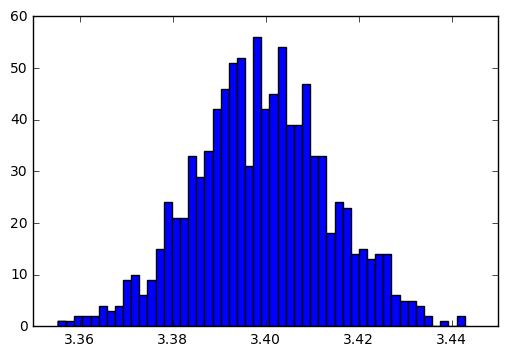

The call price via Naive Monte Carlo is: 3.399 and the standard error is 0.01449 for 100000 replications.


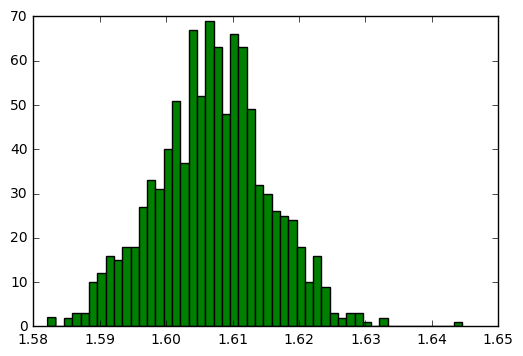

The put price via Naive Monte Carlo is: 1.607 and the standard error is 0.00860 for 100000 replications.


In [58]:
#Naive Monte Carlo with Histograms
#Market data
spot = 41.0
rate = 0.08
volatility = 0.30
dividend = 0.0
thedata = probo.MarketData(rate, spot, volatility, dividend)

expiry = 0.25
strike = 40.0
thecall = probo.VanillaPayoff(expiry, strike, probo.call_payoff)
theput = probo.VanillaPayoff(expiry, strike, probo.put_payoff)

replications = 100000
steps = 1
pricer = NaiveMonteCarloPricer
mcengine = probo.MonteCarloEngine(replications, steps, pricer)

#Calculate Price
option1 = probo.OptionFacade(thecall, mcengine, thedata)
price1=np.zeros((1000,))
for j in range(1000):
    (price1[j], stderr1) = option1.price()
plt.figure(1)
plt.hist(price1, 50, facecolor='blue')
plt.show()
print("The call price via Naive Monte Carlo is: {0:.3f} and the standard error is {1:.5f} for {2} replications.".format(np.average(price1), stderr1, replications))

option2 = probo.OptionFacade(theput, mcengine, thedata)
price2 = np.zeros((1000,))
for j in range(1000):
    (price2[j], stderr2) = option2.price()
plt.figure(2)
plt.hist(price2, 50, facecolor='green')
plt.show()
print("The put price via Naive Monte Carlo is: {0:.3f} and the standard error is {1:.5f} for {2} replications.".format(np.average(price2), stderr2, replications))

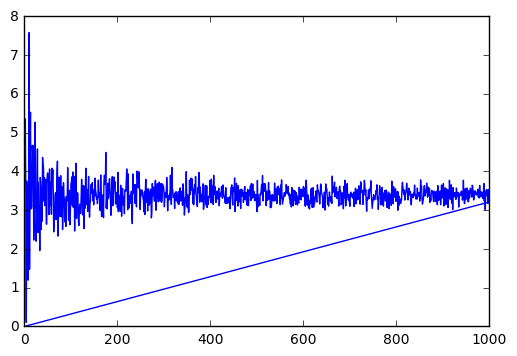

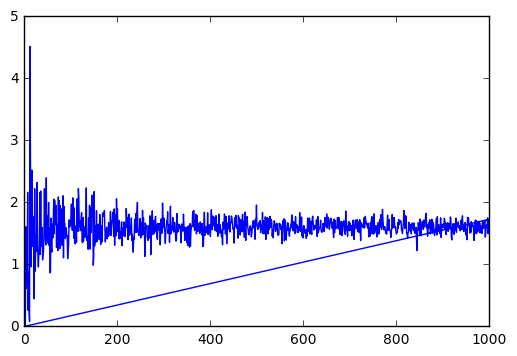

In [292]:
#Naive Monte Carlo with Covergence Graph
#Market data
spot = 41.0
rate = 0.08
volatility = 0.30
dividend = 0.0
thedata = probo.MarketData(rate, spot, volatility, dividend)

expiry = 0.25
strike = 40.0
thecall = probo.VanillaPayoff(expiry, strike, probo.call_payoff)
theput = probo.VanillaPayoff(expiry, strike, probo.put_payoff)

#Market Data
pricer = NaiveMonteCarloPricer
price1=np.zeros((1000))
price2=np.zeros((1000))
nreps=np.zeros(1000)
for reps in range(2,1000):
    mcengine = probo.MonteCarloEngine(reps, steps, pricer)
    steps = 1
    nreps[reps-2]=reps

#Calculate Price
    option1 = probo.OptionFacade(thecall, mcengine, thedata)
    option2 = probo.OptionFacade(theput, mcengine, thedata)
    (price1[reps-2], stderr1) = option1.price()
    (price2[reps-2], stderr2) =option2.price()

plt.plot(nreps, price1)
plt.show()

plt.plot(nreps,price2)
plt.show()

In [59]:
def AntitheticMonteCarloPricer(engine, option, data):
    expiry = option.expiry
    strike = option.strike
    (spot, rate, volatility, dividend) = data.get_data()
    replications = engine.replications
    dt = expiry / engine.time_steps
    disc = np.exp(-(rate - dividend) * dt)
    
    z1 = np.random.normal(size = replications)
    z2 = -z1
    z = np.concatenate((z1,z2))
    spotT = spot * np.exp((rate - dividend) * dt + volatility * np.sqrt(dt) * z)
    payoffT = option.payoff(spotT)

    prc = payoffT.mean() * disc
    stdError = payoffT.std()/np.sqrt(replications)
    return (prc, stdError)

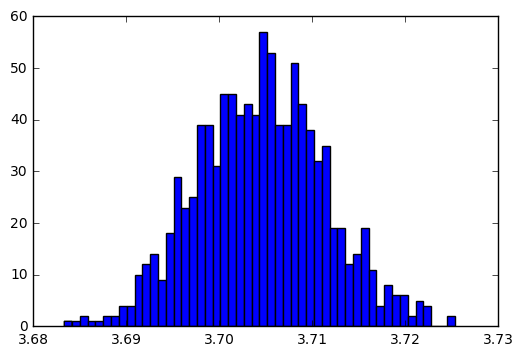

The call price via Antithetic Monte Carlo is: 3.704 and the standard error is 0.01518.


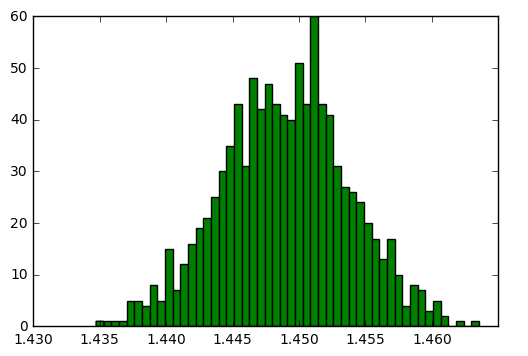

The put price via Antithetic Monte Carlo is: 1.449 and the standard error is 0.00814.


In [60]:
#Antithetic Monte Carlo with Histograms

#Market Data
spot = 41.0
rate = 0.08
volatility = 0.30
dividend = 0.0
thedata = probo.MarketData(rate, spot, volatility, dividend)


expiry = 0.25
strike = 40.0
thecall = probo.VanillaPayoff(expiry, strike, probo.call_payoff)
theput = probo.VanillaPayoff(expiry, strike, probo.put_payoff)


replitcations = 100000
steps = 1
pricer = AntitheticMonteCarloPricer
mcengine = probo.MonteCarloEngine(replications, steps, pricer)

#Calculate Price
option1 = probo.OptionFacade(thecall, mcengine, thedata)
price1 = np.zeros((1000,))
for j in range(1000):
    (price1[j], stderr1) = option1.price()
plt.figure(1)
plt.hist(price1, 50)
plt.show()
print("The call price via Antithetic Monte Carlo is: {0:.3f} and the standard error is {1:.5f}.".format(np.average(price1), stderr1))

option2 = probo.OptionFacade(theput, mcengine, thedata)

price2 = np.zeros((1000,))
for j in range(1000):
    (price2[j], stderr2) = option2.price()
plt.figure(2)
plt.hist(price2, 50, facecolor='green')
plt.show()
print("The put price via Antithetic Monte Carlo is: {0:.3f} and the standard error is {1:.5f}.".format(np.average(price2), stderr2))

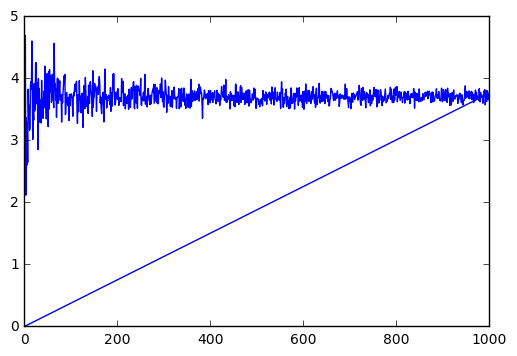

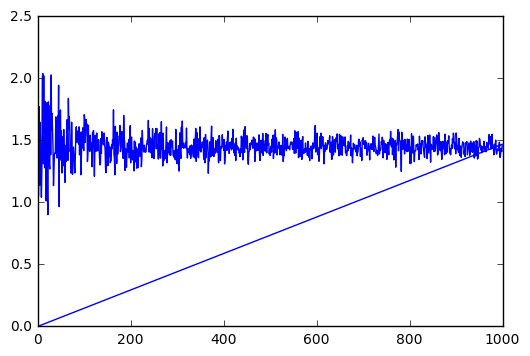

In [309]:
#Antithetic Monte Carlo with Covergence Graph
#Market data
spot = 41.0
rate = 0.08
volatility = 0.30
dividend = 0.0
thedata = probo.MarketData(rate, spot, volatility, dividend)

expiry = 0.25
strike = 40.0
thecall = probo.VanillaPayoff(expiry, strike, probo.call_payoff)
theput = probo.VanillaPayoff(expiry, strike, probo.put_payoff)

#Market Data
pricer = AntitheticMonteCarloPricer
price1=np.zeros((1000))
price2=np.zeros((1000))
nreps=np.zeros(1000)
for replications in range(2,1000):
    mcengine = probo.MonteCarloEngine(replications, steps, pricer)
    steps = 1
    nreps[replications-2]=replications

#Calculate Price
    option1 = probo.OptionFacade(thecall, mcengine, thedata)
    option2 = probo.OptionFacade(theput, mcengine, thedata)
    (price1[replications-2], stderr1) = option1.price()
    (price2[replications-2], stderr2) =option2.price()

plt.plot(nreps, price1)
plt.show()

plt.plot(nreps,price2)
plt.show()

In [62]:
#Stratified
def StratifiedMonteCarloPricer(engine, option, data):
    expiry = option.expiry
    strike = option.strike
    (spot, rate, volatility, dividend) = data.get_data()
    replications = engine.replications
    dt = expiry / engine.time_steps
    disc = np.exp(-rate * dt)

    u = np.random.uniform(size = replications)
    y = np.zeros((replications,))
    i = np.arange(replications)
    y = (u + i) / replications
    e = norm.ppf(y)

    spotT = spot * np.exp((rate - dividend - 0.5 * volatility * volatility) * dt + volatility * np.sqrt(dt) * e)
    payoffT = option.payoff(spotT)

    prc = payoffT.mean() * disc

    payoffT_std = np.std(payoffT, ddof = 1)
    payoffT_stdError = payoffT_std / np.sqrt(replications)

    return (prc, payoffT_stdError)

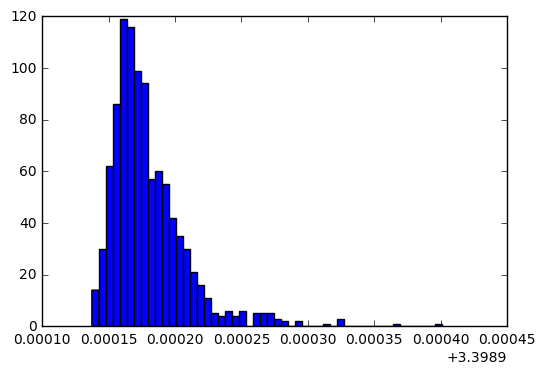

The call price via Stratified Monte Carlo is: 3.399 and the standard error is 0.01453.


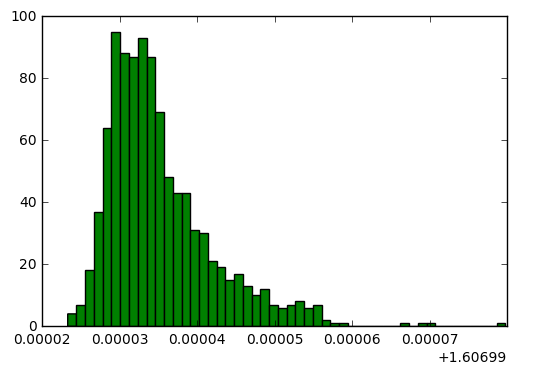

The put price via Stratified Monte Carlo is: 1.607 and the standard error is 0.00857.


In [63]:
#Market data
spot = 41.0
rate = 0.08
volatility = 0.30
dividend = 0.0
thedata = probo.MarketData(rate, spot, volatility, dividend)

expiry = 0.25
strike = 40.0
thecall = probo.VanillaPayoff(expiry, strike, probo.call_payoff)
theput = probo.VanillaPayoff(expiry, strike, probo.put_payoff)


replications = 100000
steps = 1
pricer = StratifiedMonteCarloPricer
mcengine = probo.MonteCarloEngine(replications, steps, pricer)

#Calculate Price
option1 = probo.OptionFacade(thecall, mcengine, thedata)
price1=np.zeros((1000,))
for j in range(1000):
    (price1[j], stderr1) = option1.price()
plt.figure(1)
plt.hist(price1, 50, facecolor='blue')
plt.show()
print("The call price via Stratified Monte Carlo is: {0:.3f} and the standard error is {1:.5f}.".format(np.average(price1), stderr1))

option2 = probo.OptionFacade(theput, mcengine, thedata)
price2 = np.zeros((1000,))
for j in range(1000):
    (price2[j], stderr2) = option2.price()
plt.figure(2)
plt.hist(price2, 50, facecolor='green')
plt.show()
print("The put price via Stratified Monte Carlo is: {0:.3f} and the standard error is {1:.5f}.".format(np.average(price2), stderr2))

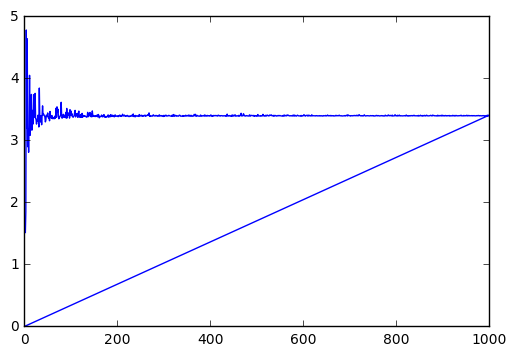

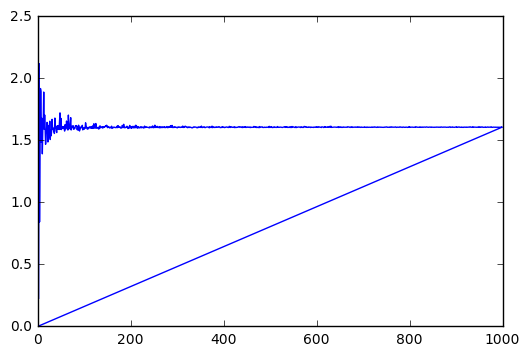

In [43]:
#Stratified Monte Carlo with Covergence Graph
#Market data
spot = 41.0
rate = 0.08
volatility = 0.30
dividend = 0.0
thedata = probo.MarketData(rate, spot, volatility, dividend)

expiry = 0.25
strike = 40.0
thecall = probo.VanillaPayoff(expiry, strike, probo.call_payoff)
theput = probo.VanillaPayoff(expiry, strike, probo.put_payoff)

#Market Data
pricer = StratifiedMonteCarloPricer
price1=np.zeros((1000))
price2=np.zeros((1000))
nreps=np.zeros(1000)
for reps in range(2,1000):
    mcengine = probo.MonteCarloEngine(reps, steps, pricer)
    steps = 1
    nreps[reps-2]=reps

#Calculate Price
    option1 = probo.OptionFacade(thecall, mcengine, thedata)
    option2 = probo.OptionFacade(theput, mcengine, thedata)
    (price1[reps-2], stderr1) = option1.price()
    (price2[reps-2],stderr2) = option2.price()

plt.plot(nreps, price1)
plt.show()

plt.plot(nreps, price2)
plt.show()

In [64]:
#Monte Carlo Control Variate
def ControlVariateMCPricer(engine, option, data):
    expiry = option.expiry
    strike = option.strike
    (spot, rate, volatility, dividend) = data.get_data()
    dt = expiry / engine.time_steps
#    nudt = (rate - dividend - 0.5 * volatility * volatility) * dt
#    sigsdt = volatility * np.sqrt(dt)
#    erddt = np.exp((rate - dividend) * dt)    
#    beta = -1.0
    cash_flow_t = np.zeros((engine.replications, ))
    price = 0.0
    replications = engine.replications
    disc = np.exp(-rate * dt)

#    for j in range(engine.replications):
#        spot_t = spot
#        convar = 0.0
#        z = np.random.normal(size=int(engine.time_steps))

#        for i in range(int(engine.time_steps)):
#            t = i * dt
#            delta = probo.BlackScholesDelta(spot, t, strike, expiry, volatility, rate, dividend)
#            spot_tn = spot_t * np.exp(nudt + sigsdt * z[i])
#            convar = convar + delta * (spot_tn - spot_t * erddt)
#            spot_t = spot_tn

#        cash_flow_t[j] = option.payoff(spot_t) + beta * convar

    z = np.random.normal(size = replications)
    spotT = spot * np.exp((rate - dividend - 0.5 * volatility * volatility) * dt + volatility * np.sqrt(dt) * z)
    cash_flow_t = option.payoff(spotT)

    price = cash_flow_t.mean() * disc
    stdError=cash_flow_t.std()/np.sqrt(replications)

#    price = np.exp(-rate * expiry) * cash_flow_t.mean()
#    stdError = cash_flow_t.std() / np.sqrt(engine.replications)

    return (price, stdError)

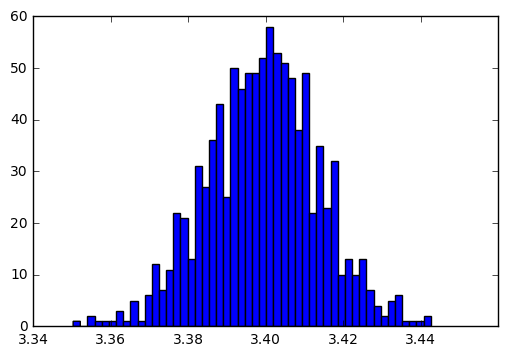

The call price via Monte Carlo Control Variate is: 3.399 and the standard error is 0.01442.


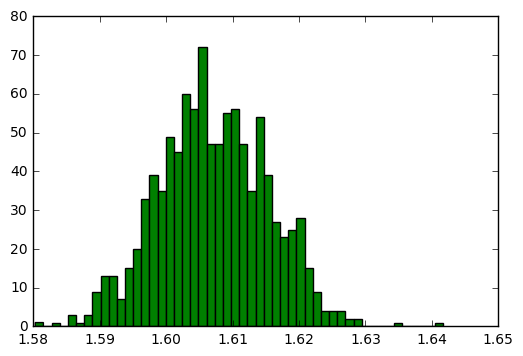

The put price via Monte Carlo Control Variate is: 1.607 and the standard error is 0.00860.


In [66]:
## Set up the market data
spot = 41.0
rate = 0.08
volatility = 0.30
dividend = 0.0
thedata = probo.MarketData(rate, spot, volatility, dividend)

## Set up the option
expiry = 0.25
strike = 40.0
thecall = probo.VanillaPayoff(expiry, strike, probo.call_payoff)
theput = probo.VanillaPayoff(expiry, strike, probo.put_payoff)

## Set up Monte Carlo
nreps = 100000
steps = 1
pricer = ControlVariateMCPricer
mcengine = probo.MonteCarloEngine(nreps, steps, pricer)

## Calculate the price
option1 = probo.OptionFacade(thecall, mcengine, thedata)
price1 = np.zeros((1000,))
for j in range(1000):
    (price1[j], stderr1) = option1.price()
plt.figure(1)
plt.hist(price1, 50)
plt.show()
print("The call price via Monte Carlo Control Variate is: {0:.3f} and the standard error is {1:.5f}.".format(np.average(price1), stderr1))

option2 = probo.OptionFacade(theput, mcengine, thedata)
price2 = np.zeros((1000,))
for j in range(1000):
    (price2[j], stderr2) = option2.price()
plt.figure(2)
plt.hist(price2, 50, facecolor='green')
plt.show()
print("The put price via Monte Carlo Control Variate is: {0:.3f} and the standard error is {1:.5f}.".format(np.average(price2), stderr2))

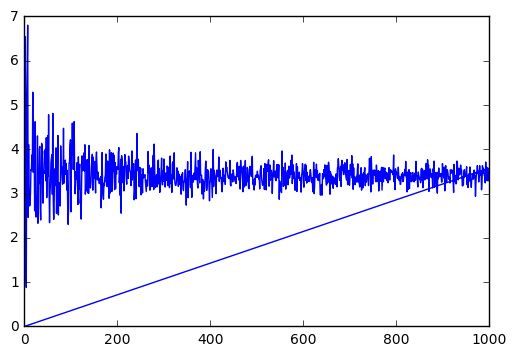

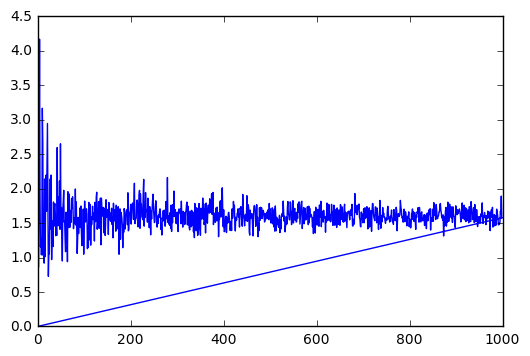

In [55]:
#Control Variate Monte Carlo with Covergence Graph
#Market data
spot = 41.0
rate = 0.08
volatility = 0.30
dividend = 0.0
thedata = probo.MarketData(rate, spot, volatility, dividend)

expiry = 0.25
strike = 40.0
thecall = probo.VanillaPayoff(expiry, strike, probo.call_payoff)
theput = probo.VanillaPayoff(expiry, strike, probo.put_payoff)

#Market Data
pricer = ControlVariateMCPricer
price1=np.zeros((1000))
price2=np.zeros((1000))
nreps=np.zeros(1000)
for reps in range(2,1000):
    mcengine = probo.MonteCarloEngine(reps, steps, pricer)
    steps = 1
    nreps[reps-2]=reps

#Calculate Price
    option1 = probo.OptionFacade(thecall, mcengine, thedata)
    option2 = probo.OptionFacade(theput, mcengine, thedata)
    (price1[reps-2], stderr1) = option1.price()
    (price2[reps-2],stderr2) = option2.price()

plt.plot(nreps, price1)
plt.show()

plt.plot(nreps, price2)
plt.show()

In [67]:
#Control Variate Black Scholes
def ControlVariateBSPricer(engine, option, data):
    expiry = option.expiry
    strike = option.strike
    (spot, rate, volatility, dividend) = data.get_data()
    dt = expiry / engine.time_steps
    nudt = (rate - dividend - 0.5 * volatility * volatility) * dt
    sigsdt = volatility * np.sqrt(dt)
    erddt = np.exp((rate - dividend) * dt)    
    beta = -1.0
    cash_flow_t = np.zeros((engine.replications, ))
    price = 0.0

    for j in range(engine.replications):
        spot_t = spot
        convar = 0.0
        z = np.random.normal(size=int(engine.time_steps))

        for i in range(int(engine.time_steps)):
            t = i * dt
            delta = probo.BlackScholesDelta(spot, t, strike, expiry, volatility, rate, dividend)
            spot_tn = spot_t * np.exp(nudt + sigsdt * z[i])
            convar = convar + delta * (spot_tn - spot_t * erddt)
            spot_t = spot_tn

        cash_flow_t[j] = option.payoff(spot_t) + beta * convar

    price = np.exp(-rate * expiry) * cash_flow_t.mean()
    stdError = cash_flow_t.std() / np.sqrt(engine.replications)
    return (price, stdError)

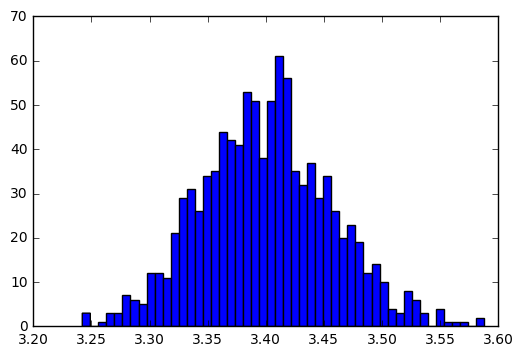

The call price via Control BS Variate is: 3.400 and the standard error is 0.05403.


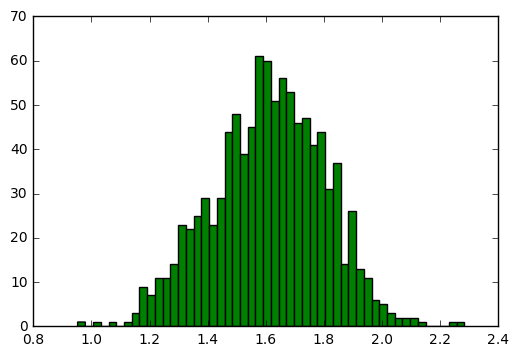

The put price via Control BS Variate is: 1.610 and the standard error is 0.20126.


In [68]:
## Set up the market data
spot = 41.0
rate = 0.08
volatility = 0.30
dividend = 0.0
thedata = probo.MarketData(rate, spot, volatility, dividend)

## Set up the option
expiry = 0.25
strike = 40.0
thecall = probo.VanillaPayoff(expiry, strike, probo.call_payoff)
theput = probo.VanillaPayoff(expiry, strike, probo.put_payoff)

## Set up 
nreps = 1000
steps = 1
pricer = ControlVariateBSPricer
mcengine = probo.MonteCarloEngine(nreps, steps, pricer)

## Calculate the price
option1 = probo.OptionFacade(thecall, mcengine, thedata)
price1 = np.zeros((1000,))
for j in range(1000):
    (price1[j], stderr1) = option1.price()
plt.figure(1)
plt.hist(price1, 50)
plt.show()
print("The call price via Control BS Variate is: {0:.3f} and the standard error is {1:.5f}.".format(np.average(price1), stderr1))

option2 = probo.OptionFacade(theput, mcengine, thedata)
price2 = np.zeros((1000,))
for j in range(1000):
    (price2[j], stderr2) = option2.price()
plt.figure(2)
plt.hist(price2, 50, facecolor='green')
plt.show()
print("The put price via Control BS Variate is: {0:.3f} and the standard error is {1:.5f}.".format(np.average(price2), stderr2))

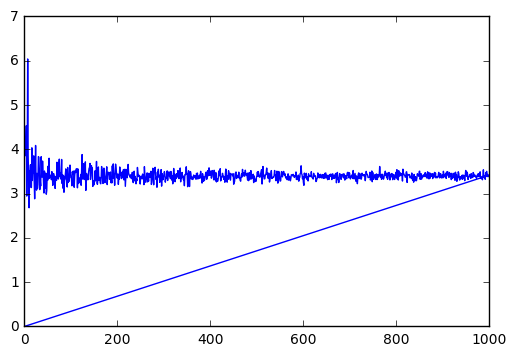

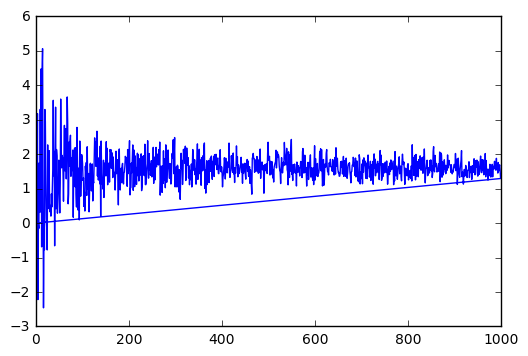

In [317]:
#Control Variate with Covergence Graph
#Market data
spot = 41.0
rate = 0.08
volatility = 0.30
dividend = 0.0
thedata = probo.MarketData(rate, spot, volatility, dividend)

expiry = 0.25
strike = 40.0
thecall = probo.VanillaPayoff(expiry, strike, probo.call_payoff)
theput = probo.VanillaPayoff(expiry, strike, probo.put_payoff)

#Market Data
pricer = ControlVariatePricer
price1=np.zeros((1000))
price2=np.zeros((1000))
nreps=np.zeros(1000)
for replications in range(2,1000):
    mcengine = probo.MonteCarloEngine(replications, steps, pricer)
    steps = 1
    nreps[replications-2]=replications

#Calculate Price
    option1 = probo.OptionFacade(thecall, mcengine, thedata)
    option2 = probo.OptionFacade(theput, mcengine, thedata)
    (price1[replications-2], stderr1) = option1.price()
    (price2[replications-2], stderr2) =option2.price()

plt.plot(nreps, price1)
plt.show()

plt.plot(nreps,price2)
plt.show()

In [88]:
thedata = probo.MarketData(rate=.08, spot=41.0, volatility=.3, dividend=0)

thecall = probo.VanillaPayoff(payoff=probo.call_payoff, strike=40.0, expiry=(90/365))

bsengine = probo.BlackScholesPricingEngine("call", probo.BlackScholesPricer)
option3 =  probo.OptionFacade(thecall, bsengine, thedata)
price3 = option3.price()
print("The call price via Black-Scholes is: {0:.3f}".format(price3))

The call price via Black-Scholes is: 3.377


In [89]:
thedata = probo.MarketData(rate=.08, spot=41.0, volatility=.3, dividend=0)

thecall = probo.VanillaPayoff(payoff=probo.put_payoff, strike=40.0, expiry=(90/365))

bsengine = probo.BlackScholesPricingEngine("put", probo.BlackScholesPricer)
option3 =  probo.OptionFacade(thecall, bsengine, thedata)
price3 = option3.price()
print("The put price via Black-Scholes is: {0:.3f}".format(price3))

The put price via Black-Scholes is: 1.596


**2.** (20 points) Extend the probo object-oriented options pricing module that we developed
in class (available on my Github page) by creating a new class that inherits from class
Payoff. Call it StrangePayoff. Use the strategy design pattern as we did with class
VanillaPayoff for the following payoff functions

• $S_T^2$

•$\sqrt{(S_T)}$

• $S_T^{-1}$

Use the same market data variables as in problem 1. Estimate the prices for European
options with these payoffs using naive, antithetic, and stratified sampling Monte Carlo.
Report both prices and standard errors. Compare your answers.

<span style="color:red">**Compare Our Answers **</span>

- Naive
    - 1755.633, 1.7299
    - 6.325, .0015
    - .024, 0
- Antithetic
    - 1753.65, 1.7318
    - 6.322, .0015
    - .024, 0
- Stratified
    - 1753.981, 1.7365
    - 6.322, .0015
    - .024, 0
    
The Antithetic and Stratified are pretty close in value, while the Naive outputs the highest option value. The Stratified had the largest standard deviation.

In [72]:
import numpy as np

class StrangePayoff(object):
    def __init__(self, expiry, payoff):
        self.__expiry = expiry
        self.__payoff = payoff
    
    @property
    def expiry(self):
        return self.__expiry
    
    @expiry.setter
    def expiry(self, new_expiry):
        self.__expiry = new_expiry
    
    def payoff(self, spot):
        return self.__payoff(spot)

def payoff1(spot):
    return spot*spot

def payoff2(spot):
    return np.sqrt(spot)

def payoff3(spot):
    return 1/spot

In [75]:
def AntitheticMonteCarlo(option, spot, rate, volatility, dividend, reps):
    expiry = option.expiry
    dt = expiry
    nudt = (rate - dividend - 0.5 * volatility * volatility) * dt
    sigdt = volatility * np.sqrt(dt)
    x = np.random.normal(size=reps)
    y = np.concatenate((x, -x))

    spot_t = 0.0
    cashFlow_t = 0.0

    spot_t = spot * np.exp(nudt + sigdt * y)
    cashFlow_t = option.payoff(spot_t)

    price = cashFlow_t.mean() * np.exp(-rate * expiry)
    stdError = cashFlow_t.std() / np.sqrt(reps)

    return (price, stdError)

def main():
    spot = 41.0
    rate = 0.08
    volatility = 0.30
    dividend = 0.0
    expiry = 0.25
    reps = 100000

    the_call1 = StrangePayoff(expiry, payoff1)
    the_call2 = StrangePayoff(expiry, payoff2)
    the_call3 = StrangePayoff(expiry, payoff3)
    (call_price1, stdError1) = AntitheticMonteCarlo(the_call1, spot, rate, volatility, dividend, reps)
    (call_price2, stdError2) = AntitheticMonteCarlo(the_call2, spot, rate, volatility, dividend, reps)
    (call_price3, stdError3) = AntitheticMonteCarlo(the_call3, spot, rate, volatility, dividend, reps)
    print("The call price is {0:.3f} ({1:.4f}) for {2} replications.".format(call_price1, stdError1, reps))
    print("The call price is {0:.3f} ({1:.4f}) for {2} replications.".format(call_price2, stdError2, reps))
    print("The call price is {0:.3f} ({1:.4f}) for {2} replications.".format(call_price3, stdError3, reps))

if __name__ == "__main__":
    main()

The call price is 1753.650 (1.7318) for 100000 replications.
The call price is 6.322 (0.0015) for 100000 replications.
The call price is 0.024 (0.0000) for 100000 replications.


In [76]:
def NaiveMonteCarlo(option, spot, rate, volatility, dividend, reps):
    expiry = option.expiry
    dt = expiry
    nudt = (rate - dividend - 0.5 * volatility * volatility) * dt
    sigdt = volatility * np.sqrt(dt)
    z = np.random.normal(size=reps)

    spot_t = 0.0
    cashFlow_t = 0.0

    spot_t = spot * np.exp(nudt + sigdt * z)
    cashFlow_t = option.payoff(spot_t)

    price = cashFlow_t.mean() * np.exp(-rate * expiry)
    stdError = cashFlow_t.std() / np.sqrt(reps)

    return (price, stdError)

def main():
    strike = 40.0
    spot = 41.0
    rate = 0.08
    volatility = 0.30
    dividend = 0.0
    expiry = 0.25
    reps = 100000
    
    the_call1 = StrangePayoff(expiry, payoff1)
    the_call2 = StrangePayoff(expiry, payoff2)
    the_call3 = StrangePayoff(expiry, payoff3)
    (call_price1, stdError1) = NaiveMonteCarlo(the_call1, spot, rate, volatility, dividend, reps)
    (call_price2, stdError2) = NaiveMonteCarlo(the_call2, spot, rate, volatility, dividend, reps)
    (call_price3, stdError3) = NaiveMonteCarlo(the_call3, spot, rate, volatility, dividend, reps)
    print("The call price is {0:.3f} ({1:.4f}) for {2} replications.".format(call_price1, stdError1, reps))
    print("The call price is {0:.3f} ({1:.4f}) for {2} replications.".format(call_price2, stdError2, reps))
    print("The call price is {0:.3f} ({1:.4f}) for {2} replications.".format(call_price3, stdError3, reps))

if __name__ == "__main__":
    main()

The call price is 1755.633 (1.7299) for 100000 replications.
The call price is 6.325 (0.0015) for 100000 replications.
The call price is 0.024 (0.0000) for 100000 replications.


In [79]:
def StratifiedMonteCarloPricerS(option, spot, rate, volatility, dividend, reps):
    expiry = option.expiry
    dt = expiry
    disc = np.exp(-rate * dt)

    u = np.random.uniform(size = replications)
    y = np.zeros((replications,))
    i = np.arange(replications)
    y = (u + i) / replications
    e = norm.ppf(y)

    spotT = spot * np.exp((rate - dividend - 0.5 * volatility * volatility) * dt + volatility * np.sqrt(dt) * e)
    payoffT = option.payoff(spotT)

    prc = payoffT.mean() * disc

    payoffT_std = np.std(payoffT, ddof = 1)
    payoffT_stdError = payoffT_std / np.sqrt(replications)

    return (prc, payoffT_stdError)

def main():
    strike = 40.0
    spot = 41.0
    rate = 0.08
    volatility = 0.30
    dividend = 0.0
    expiry = 0.25
    reps = 100000
    
    the_call1 = StrangePayoff(expiry, payoff1)
    the_call2 = StrangePayoff(expiry, payoff2)
    the_call3 = StrangePayoff(expiry, payoff3)
    (call_price1, stdError1) = StratifiedMonteCarloPricerS(the_call1, spot, rate, volatility, dividend, reps)
    (call_price2, stdError2) = StratifiedMonteCarloPricerS(the_call2, spot, rate, volatility, dividend, reps)
    (call_price3, stdError3) = StratifiedMonteCarloPricerS(the_call3, spot, rate, volatility, dividend, reps)
    print("The call price is {0:.3f} ({1:.4f}) for {2} replications.".format(call_price1, stdError1, reps))
    print("The call price is {0:.3f} ({1:.4f}) for {2} replications.".format(call_price2, stdError2, reps))
    print("The call price is {0:.3f} ({1:.4f}) for {2} replications.".format(call_price3, stdError3, reps))

if __name__ == "__main__":
    main()

The call price is 1753.981 (1.7365) for 100000 replications.
The call price is 6.322 (0.0015) for 100000 replications.
The call price is 0.024 (0.0000) for 100000 replications.


**3.** (40 points) Price an arithmetic Asian call option as in the McDonald Chapter 19 reading
using the geometric Asian option pricing formula as a control variate (as outlined in Chapter
19). Compare your answers to the naive Monte Carlo method. Compute prices and standard
errors. Produce histograms and convergence graphs as in problem 1.

In [64]:
#Arithmetic Asian 
def AAsianOpt(s0,x,T,r,sigma,n_simulation, n_steps):
    dt=T/n_steps
    call=sp.zeros([n_simulation], dtype=float)
    put=sp.zeros([n_simulation], dtype=float)
    
    for j in range(0, n_simulation):
        sT=s0
        total=0
        for i in range(0,int(n_steps)):
            e=sp.random.normal()
            sT*=sp.exp((r-0.5*sigma*sigma)*dt+sigma*e*sp.sqrt(dt))
            total+=sT
        price_average=total/n_steps
        call[j]=max(price_average-x,0)
        put[j] = max(x-price_average, 0)
    
    call_price = sp.mean(call)*sp.exp(-r*T)
    put_price=sp.mean(put)*sp.exp(-r*T)
    
    stdError1= call.std()/np.sqrt(n_steps)
    stdError2= put.std()/np.sqrt(n_steps)
        
    return (call_price, put_price, stdError1, stdError2)

s0=40.
x=40.
T=0.5
r=0.05
sigma=0.2
n_simulation=1000
n_steps=2.
    
print("The Arithmetic Call Price is {0:.3f}, the Arithmetic Put Price is {1:.3f} for {2} replications".format(call_price, put_price, n_simulation))

The Arithmetic Call Price is 1.557, the Arithmetic Put Price is 1.153 for 1000 replications


In [50]:
#Geometric Asian
from scipy.stats import norm
def GeoAsianOpt(spot,vol,strike,rate,expiry,n_steps,type='C'):

#type (C for call, Else for put)

    adj_vol=vol*np.sqrt((2*n_steps+1)/(6*(n_steps+1)))
    rho=0.5*(rate-(vol**2)*0.5+adj_vol**2)
    d1 = (np.log(spot/strike)+(rho+0.5*adj_vol**2)*expiry)/(adj_vol*np.sqrt(expiry))
    d2 = (np.log(spot/strike)+(rho-0.5*adj_vol**2)*expiry)/(adj_vol*np.sqrt(expiry))

    if type=='C':
        price = np.exp(-rate*expiry)*(spot*np.exp(rho*expiry)*norm.cdf(d1)-strike*norm.cdf(d2));
    else:
        price = np.exp(-rate*expiry)*(strike*norm.cdf(-d2)-spot*np.exp(rho*expiry)*norm.cdf(-d1));
        
    stdError= price.std()/np.sqrt(n_steps)
        
    return price, stdError
spot = 41.0
vol = 0.3
strike = 40.0
rate = 0.08
expiry = 0.25
n_steps=1000


print ("The Asian Geometric Option Call Price is:", GeoAsianOpt(spot,vol,strike,rate,expiry,n_steps,type='C'))
print ("The Asian Geometric Option Put Price is:", GeoAsianOpt(spot,vol,strike,rate,expiry,n_steps,type='P'))

The Asian Geometric Option Call Price is: (2.1280503531063202, 0.0)
The Asian Geometric Option Put Price is: (0.82006876554963026, 0.0)
